# 1/ Import Package

In [1]:
import numpy as np 
import pandas as pd 

# For Preprocesssing Text Data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualizing Wordcloud
from wordcloud import WordCloud

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# Check Performance
from sklearn.metrics import classification_report

# 2/ Import Data

In [2]:
train = pd.read_csv('/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/train.csv')
test = pd.read_csv('/kaggle/input/ipba-17-nlp-with-disaster-tweets-2024/test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# 3/ Check Target Feature

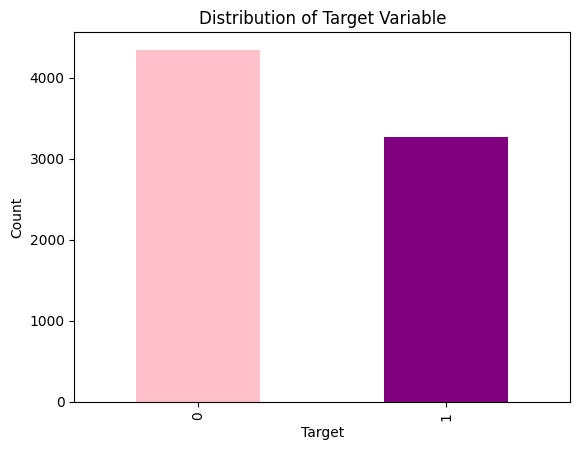

In [5]:
import matplotlib.pyplot as plt

# Define custom colors for the bars
custom_colors = ['pink', 'purple']  # Blue for target 0, orange for target 1

# Create a bar plot of the target variable with custom colors
train['target'].value_counts().plot(kind='bar', color=custom_colors)

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

# Show the plot
plt.show()


#  3/ Check Descriptive Stat 

In [6]:
train.shape

(7613, 5)

In [7]:
# Create Length Feature
# Column to operate - text
# Function to get Length - len()
# Apply the Function - apply() - applies it row wise

train['text_lenght'] = train['text'].apply(lambda x : len(x))

In [8]:
max(train['text_lenght'])

157

<Axes: ylabel='Frequency'>

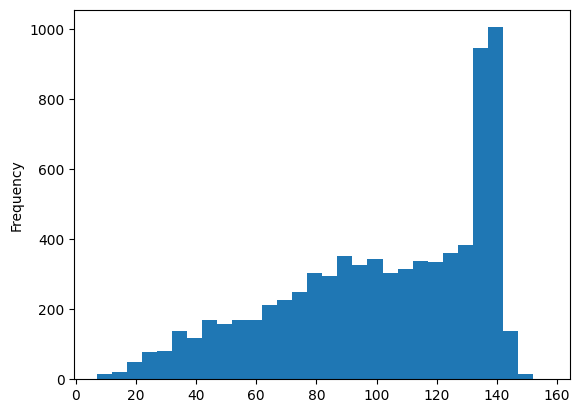

In [9]:
train['text_lenght'].plot.hist(bins = 30)

In [10]:
train.head()

,id,keyword,location,text,target,text_lenght
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


# 4/ Cleaning - Convert to Lower Case

In [11]:
# Showing only
train['text'].apply(lambda x : x.lower())

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

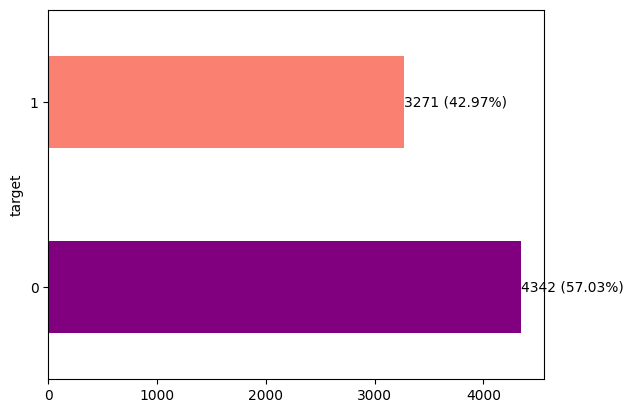

In [12]:
import matplotlib.pyplot as plt

# Calculate value counts and percentages
value_counts = train['target'].value_counts()
total_samples = len(train['target'])
percentages = (value_counts / total_samples) * 100

# Plot horizontal bar plot
ax = value_counts.plot.barh(color=['salmon' if idx == 1 else 'purple' for idx in value_counts.index])

# Annotate bars with counts and percentages
for i, (count, percent) in enumerate(zip(value_counts, percentages)):
    ax.text(count, i, f'{count} ({percent:.2f}%)', color='black', va='center')

plt.show()

In [13]:
# Commit to Table
train['text'] = train['text'].apply(lambda x : x.lower())

In [14]:
train.head()

,id,keyword,location,text,target,text_lenght
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,69
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,88


# 5/ Cleaning - Remove Stopwords

In [15]:
# Get Stopwords
stop = stopwords.words('english')

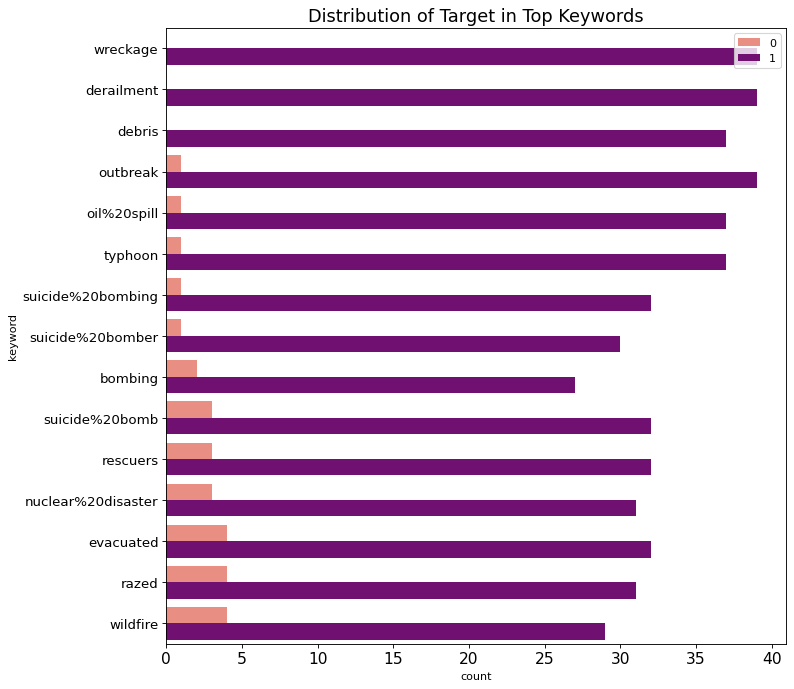

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean target value for each keyword
train['target_mean'] = train.groupby('keyword')['target'].transform('mean')

# Select the top N keywords based on their mean target value
top_keywords = train.groupby('keyword')['target_mean'].mean().nlargest(15).index

# Filter the DataFrame to only include the top N keywords
top_train = train[train['keyword'].isin(top_keywords)]

# Define custom color palette for target variable (0: blue, 1: red)
custom_palette = {0: 'salmon', 1: 'purple'}

# Create a figure with customized size and DPI
fig = plt.figure(figsize=(10, 10), dpi=80)

# Plot the count of keywords sorted by mean target value, with target as hue
sns.countplot(y=top_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=top_train.sort_values(by='target_mean', ascending=False)['target'],
              palette=custom_palette)

# Customize tick label sizes
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=12)

# Place legend at a specific location (loc=1: upper right)
plt.legend(loc=1)

# Add a title to the plot
plt.title('Distribution of Target in Top Keywords', fontsize=16)

# Show the plot
plt.show()


In [17]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
x = "i have a date on sunday with will!!"

In [19]:
[word for word in x.split() if word not in stop]

['date', 'sunday', 'will!!']

In [20]:
# Tokenize and Remove Stop Words
train['text'].apply(lambda x: [word for word in x.split() if word not in stop])

0       [deeds, reason, #earthquake, may, allah, forgi...
1          [forest, fire, near, la, ronge, sask., canada]
2       [residents, asked, 'shelter, place', notified,...
3       [13,000, people, receive, #wildfires, evacuati...
4       [got, sent, photo, ruby, #alaska, smoke, #wild...
                              ...                        
7608    [two, giant, cranes, holding, bridge, collapse...
7609    [@aria_ahrary, @thetawniest, control, wild, fi...
7610    [m1.94, [01:04, utc]?5km, volcano, hawaii., ht...
7611    [police, investigating, e-bike, collided, car,...
7612    [latest:, homes, razed, northern, california, ...
Name: text, Length: 7613, dtype: object

In [21]:
train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0           deeds reason #earthquake may allah forgive us
1                  forest fire near la ronge sask. canada
2       residents asked 'shelter place' notified offic...
3       13,000 people receive #wildfires evacuation or...
4       got sent photo ruby #alaska smoke #wildfires p...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @thetawniest control wild fires c...
7610    m1.94 [01:04 utc]?5km volcano hawaii. http://t...
7611    police investigating e-bike collided car littl...
7612    latest: homes razed northern california wildfi...
Name: text, Length: 7613, dtype: object

In [22]:
# Join the words back
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [23]:
train.head(10)

,id,keyword,location,text,target,text_lenght,target_mean
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1,69,NaN
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,NaN
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1,133,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,NaN
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1,88,NaN
5,8,NaN,NaN,#rockyfire update => california hwy. 20 closed...,1,110,NaN
6,10,NaN,NaN,#flood #disaster heavy rain causes flash flood...,1,95,NaN
7,13,NaN,NaN,i'm top hill see fire woods...,1,59,NaN
8,14,NaN,NaN,there's emergency evacuation happening buildin...,1,79,NaN
9,15,NaN,NaN,i'm afraid tornado coming area...,1,52,NaN


# 5/ Cleaning - Lemmatize

In [24]:
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


True

In [25]:
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

In [26]:
wordnet = WordNetLemmatizer()

In [27]:
# Lemmatize
train['text'].apply(lambda x : wordnet.lemmatize(x))

0           deeds reason #earthquake may allah forgive us
1                  forest fire near la ronge sask. canada
2       residents asked 'shelter place' notified offic...
3       13,000 people receive #wildfires evacuation or...
4       got sent photo ruby #alaska smoke #wildfires p...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @thetawniest control wild fires c...
7610    m1.94 [01:04 utc]?5km volcano hawaii. http://t...
7611    police investigating e-bike collided car littl...
7612    latest: homes razed northern california wildfi...
Name: text, Length: 7613, dtype: object

In [28]:
# Commit to Table
train['text'] = train['text'].apply(lambda x : wordnet.lemmatize(x))

In [29]:
train.head()

,id,keyword,location,text,target,text_lenght,target_mean
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1,69,NaN
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,NaN
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1,133,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,NaN
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1,88,NaN


# 6/ Post Pre Cleaning

In [30]:
# Create Length Feature
train['post_text_lenght'] = train['text'].apply(lambda x : len(x))
train.head()

,id,keyword,location,text,target,text_lenght,target_mean,post_text_lenght
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1,69,NaN,45
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,NaN,38
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1,133,NaN,91
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,NaN,61
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1,88,NaN,57


In [31]:
# Export to Check
# train.head(50).to_csv('spam_data_cleaned.csv', index = False)

# 7/ Partition¶

In [32]:
y = train['target']
X = train[['text','text_lenght']] # Dont use Ids

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) # Can you stratify?

# 7/ Preprocessing - Transforming to Numericals Building Models
### CountVectorizer (sklearn.feature_extraction.text)
### TF-IDF
### ngrams

# 7.1/ CountVectorizer Model

In [34]:
# Import
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# Create and Intance with max 3000 features
cv = CountVectorizer(max_features=3000)

In [36]:
# Fit 
cv.fit(X_train['text'])

CountVectorizer(max_features=3000)

In [37]:
X_train_cv = cv.transform(X_train['text']).toarray()
X_val_cv = cv.transform(X_val['text']).toarray()

In [38]:
cv.transform(X_train['text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
#train_with_cv = pd.DataFrame(X_train_cv, columns= cv.get_feature_names_out())
#train_with_cv.head()

We want to preprocess our text to keep non-word characters (including hashtags,exclamations) for one of our tokenizers so that we can test with and without

In [40]:
def preprocessing(text):
    text = text.lower()
    return text

train['text_processed'] = train['text'].apply(preprocessing)
print(train['text_processed'].head(5))

0        deeds reason #earthquake may allah forgive us
1               forest fire near la ronge sask. canada
2    residents asked 'shelter place' notified offic...
3    13,000 people receive #wildfires evacuation or...
4    got sent photo ruby #alaska smoke #wildfires p...
Name: text_processed, dtype: object


In [41]:
'''
import re
import spacy

nlp = spacy.load('en_core_web_sm')
lemmatizer = nlp.get_pipe('lemmatizer')

def tokenizer(tweet):
    #tokenizer 1
    doc = nlp(tweet)
    tokens = [token.text for token in doc]
    return tokens
    
def lemma_tokenizer(tweet):
    
    try:
        #tokenizer 2
        doc = nlp(tweet)
        tokens = []

        for token in doc:
            t = token.lemma_
            new_token = re.subn(r'\W','',t,count=len(t))
            if new_token[0] == '':
                continue
            tokens.append(new_token[0])

        return tokens
    except Exception as e:
        print(f"Exception in lemma_tokenizer: {e}")
        return None
'''

'\nimport re\nimport spacy\n\nnlp = spacy.load(\'en_core_web_sm\')\nlemmatizer = nlp.get_pipe(\'lemmatizer\')\n\ndef tokenizer(tweet):\n    #tokenizer 1\n    doc = nlp(tweet)\n    tokens = [token.text for token in doc]\n    return tokens\n    \ndef lemma_tokenizer(tweet):\n    \n    try:\n        #tokenizer 2\n        doc = nlp(tweet)\n        tokens = []\n\n        for token in doc:\n            t = token.lemma_\n            new_token = re.subn(r\'\\W\',\'\',t,count=len(t))\n            if new_token[0] == \'\':\n                continue\n            tokens.append(new_token[0])\n\n        return tokens\n    except Exception as e:\n        print(f"Exception in lemma_tokenizer: {e}")\n        return None\n'

In [42]:
'''
train['tokenized'] = train['text_processed'].apply(tokenizer)
train['tokenized_lemma'] = train['text_processed'].apply(lemma_tokenizer)
display(train.head(5))
'''

"\ntrain['tokenized'] = train['text_processed'].apply(tokenizer)\ntrain['tokenized_lemma'] = train['text_processed'].apply(lemma_tokenizer)\ndisplay(train.head(5))\n"

In [43]:
#train_with_cv.columns.tolist()

In [44]:
# Export to Check
# train_with_cv.head(50).to_csv('spam_data_count.csv', index = False)

# 8/ PCA

In [45]:
# Import Package
from sklearn.decomposition import PCA

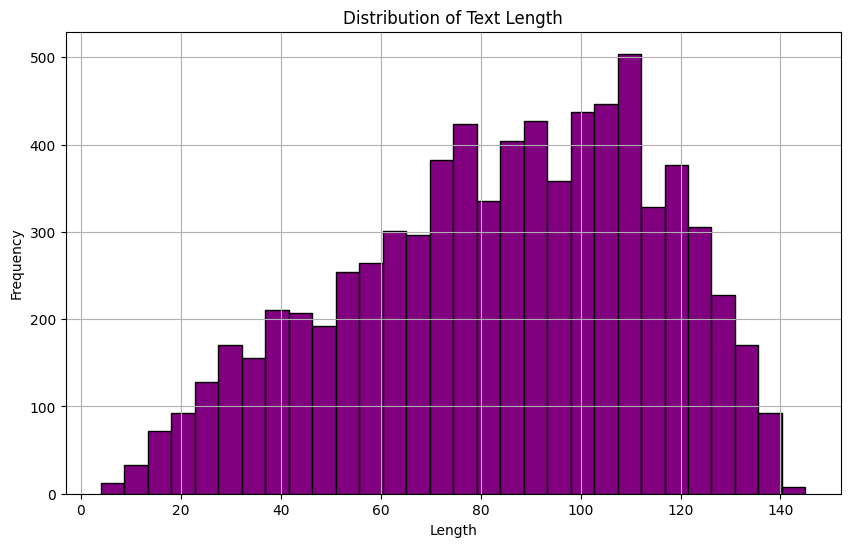

In [46]:
import matplotlib.pyplot as plt

# Compute the length of each text
train['length'] = train['text'].apply(len)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(train['length'], bins=30, color='purple', edgecolor='black')  # Adjust the color and edgecolor
plt.xlabel('Length')  # Label for x-axis
plt.ylabel('Frequency')    # Label for y-axis
plt.title('Distribution of Text Length')  # Title for the plot
plt.grid(True)  # Add gridlines for better readability
plt.show()


In [47]:
# Create Instance
pca = PCA(n_components=5)

In [48]:
# Fit
pca.fit(X_train_cv)

PCA(n_components=5)

In [49]:
# Transform
X_train_cv = pca.transform(X_train_cv)
X_val_cv = pca.transform(X_val_cv)

In [50]:
X_train_cv

array([[ 5.17142981e-01, -4.22575806e-02,  2.19285381e+00,
         3.07850691e-01, -3.27110714e-02],
       [ 5.64415616e-01, -6.10176125e-02, -6.13614137e-02,
         7.79018986e-02,  1.53230121e-01],
       [-8.44859738e-01, -5.90210671e-02, -7.15501308e-02,
        -5.06156269e-03, -1.38694042e-02],
       ...,
       [ 1.95828485e+00, -9.10647720e-02,  1.56810770e-02,
         2.42797130e-02, -7.93754590e-02],
       [-8.49377826e-01, -6.72174032e-02, -9.96505181e-02,
        -1.98411597e-02, -2.45210313e-02],
       [-8.51302373e-01, -7.19840221e-02, -1.02757004e-01,
         9.49313637e-02, -2.09454350e-04]])

# 9/ Build Model Predict

In [51]:
# Import Package
#from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [52]:
!pip install wordcloud

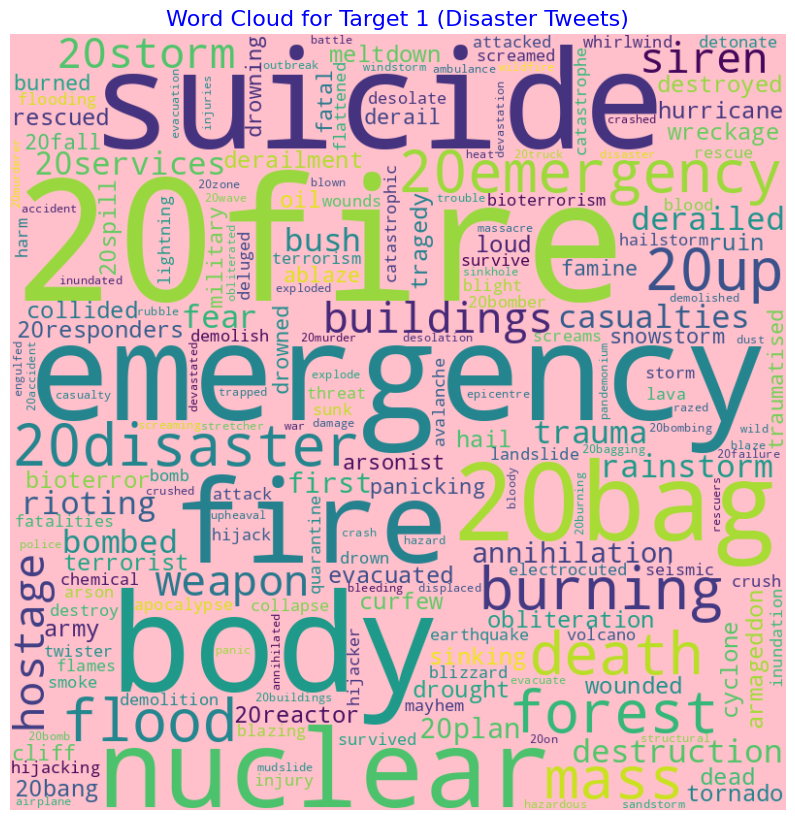

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame for tweets with target value 1 (disaster)
disaster_tweets = train[train['target'] == 1]

# Remove duplicate keywords and generate word cloud for target 1
wordcloud_target_1 = WordCloud(width=800, height=800, background_color='pink', min_font_size=10).generate(' '.join(set(disaster_tweets['keyword'].dropna())))

# Plot word cloud for target 1
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_target_1, interpolation='bilinear')  # Interpolation method for smooth rendering
plt.title('Word Cloud for Target 1 (Disaster Tweets)', fontsize=16, color='blue')  # Title with custom fontsize and color
plt.axis("off")
plt.tight_layout(pad=0)

# Optionally, save the plot to a file
# plt.savefig("wordcloud_disaster_tweets.png", bbox_inches='tight')

plt.show()


In [54]:
# Create Instance
# nb = MultinomialNB()
lr = LogisticRegression()

In [55]:
# Fit
lr.fit(X_train_cv,y_train)

LogisticRegression()

In [56]:
# Filter the DataFrame for tweets with target value 1 (disaster)
disaster_tweets = train[train['target'] == 1]

# Count unique keywords for target 1
keyword_counts_target_1 = disaster_tweets['keyword'].value_counts()

print("Keyword counts for target 1:")
print(keyword_counts_target_1)

Keyword counts for target 1:
keyword
derailment     39
wreckage       39
outbreak       39
debris         37
oil%20spill    37
               ..
blazing         1
epicentre       1
body%20bag      1
electrocute     1
ruin            1
Name: count, Length: 220, dtype: int64


# 10/ Generate word cloud for target 0

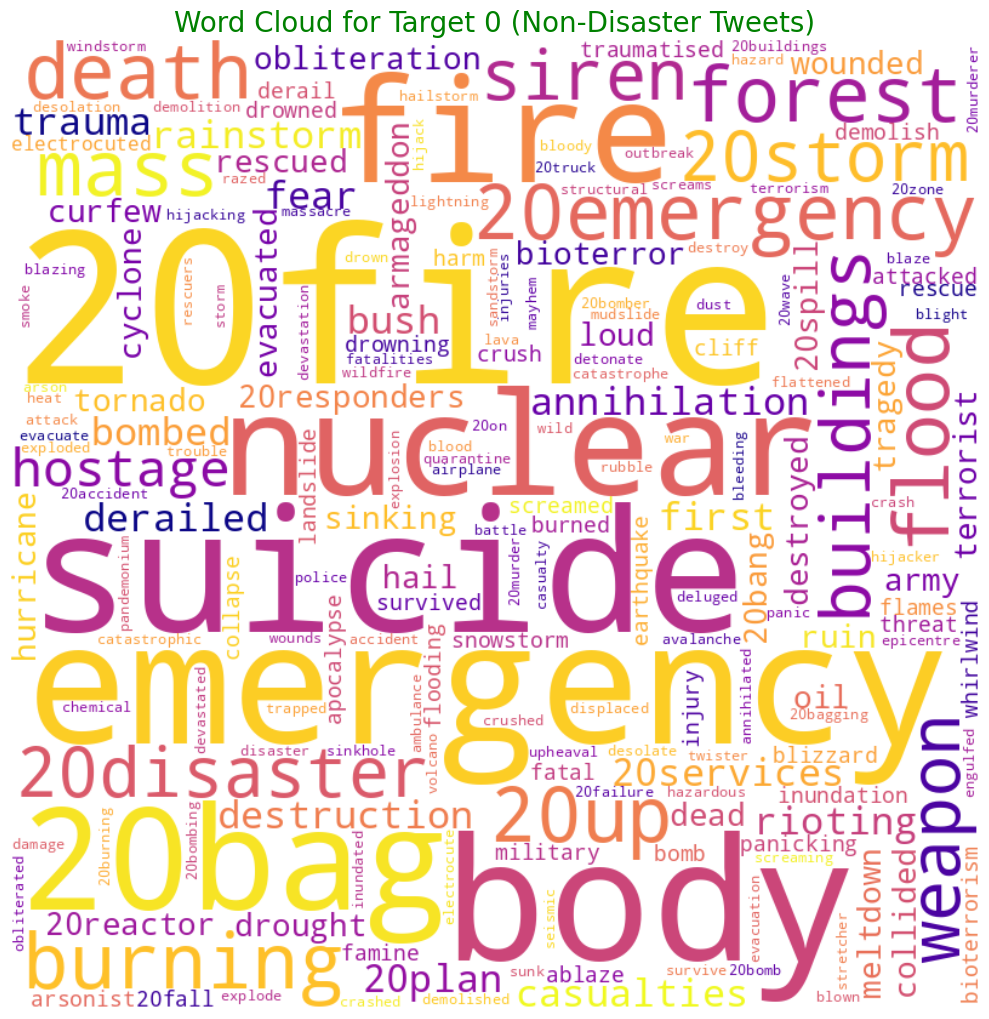

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame for tweets with target value 0 (non-disaster)
non_disaster_tweets = train[train['target'] == 0]

# Remove duplicate keywords and generate word cloud for target 0
wordcloud_target_0 = WordCloud(width=800, height=800, background_color='white', colormap='plasma', min_font_size=10).generate(' '.join(set(non_disaster_tweets['keyword'].dropna())))

# Plot word cloud for target 0
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_target_0, interpolation='bilinear')
plt.title('Word Cloud for Target 0 (Non-Disaster Tweets)', fontsize=20, color='green')  # Title with custom fontsize and color
plt.axis("off")
plt.tight_layout(pad=0)

# Optionally, save the plot to a file
# plt.savefig("wordcloud_non_disaster_tweets.png", bbox_inches='tight')

plt.show()


# 10/ Predict or Train and Validation

In [58]:
# Predict
y_train_pred = lr.predict(X_train_cv)
y_val_pred = lr.predict(X_val_cv)

In [59]:
#number of unique values in location
train['location'].nunique()

3341

In [60]:
#number of unique values in location
train['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [61]:
#number of unique values in keyword
train['keyword'].nunique()

221

In [62]:
#number of unique values in keyword
train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

# 11/ Check Accuracy¶

In [63]:
print('Train Report ---')
print(classification_report(y_train, y_train_pred))

Train Report ---
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      3456
           1       0.59      0.47      0.52      2634

    accuracy                           0.63      6090
   macro avg       0.62      0.61      0.61      6090
weighted avg       0.63      0.63      0.62      6090



In [64]:
print('Validation Report ---')
print(classification_report(y_val, y_val_pred))

Validation Report ---
              precision    recall  f1-score   support

           0       0.68      0.77      0.73       886
           1       0.61      0.50      0.55       637

    accuracy                           0.66      1523
   macro avg       0.65      0.64      0.64      1523
weighted avg       0.65      0.66      0.65      1523



In [65]:
description = train['length'].describe(percentiles=[.25, .50, .75])
print(description)

count    7613.000000
mean       83.962827
std        30.580873
min         4.000000
25%        63.000000
50%        87.000000
75%       109.000000
max       145.000000
Name: length, dtype: float64


In [66]:
import warnings
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

#given training set, so no need to train_test_split
X_train = train['text_processed'].values
y_train = train['target'].values

#create pipeline and parameters
pipe_dt = Pipeline([('vect', TfidfVectorizer()),
                     ('dt', DecisionTreeClassifier())
])

param_grid = {
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 2500, 5000, 7500],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'dt__max_depth': [5,10,15]
}


gs_pipe_dt = GridSearchCV(estimator=pipe_dt,param_grid=param_grid,cv=2,n_jobs=-1,scoring='f1')
gs_pipe_dt.fit(X_train,y_train)


print(f'best parameters  : {gs_pipe_dt.best_params_}')
print(f'best cv accuracy : {gs_pipe_dt.best_score_.round(2):0.2f}')

best parameters  : {'dt__max_depth': 5, 'vect__max_df': 1.0, 'vect__max_features': 7500, 'vect__ngram_range': (1, 1)}
best cv accuracy : 0.60


# ****Model Evaluation****

In [67]:
import numpy as np
import string
from nltk.corpus import stopwords


# Load English stopwords
STOPWORDS = set(stopwords.words('english'))

# Feature engineering

# Word count
train['url_count'] = train['text'].apply(lambda x: len(str(x).split()))

# Word count
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))

# Unique word count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))

# Stop word count
train['stop_word_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# URL count
train['url_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# Mean word length
train['mean_word_length'] = train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Character count
train['char_count'] = train['text'].apply(lambda x: len(str(x)))

# Punctuation count
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Hashtag count
train['hashtag_count'] = train['text'].apply(lambda x: x.count('#'))

# Mention count
train['mention_count'] = train['text'].apply(lambda x: x.count('@'))

# Print the DataFrame to display the changes
print(train.head())

   id keyword location                                               text  \
0   1     NaN      NaN      deeds reason #earthquake may allah forgive us   
1   4     NaN      NaN             forest fire near la ronge sask. canada   
2   5     NaN      NaN  residents asked 'shelter place' notified offic...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  got sent photo ruby #alaska smoke #wildfires p...   

   target  text_lenght  target_mean  post_text_lenght  \
0       1           69          NaN                45   
1       1           38          NaN                38   
2       1          133          NaN                91   
3       1           65          NaN                61   
4       1           88          NaN                57   

                                      text_processed  length  url_count  \
0      deeds reason #earthquake may allah forgive us      45          0   
1             forest fire near la ronge sask

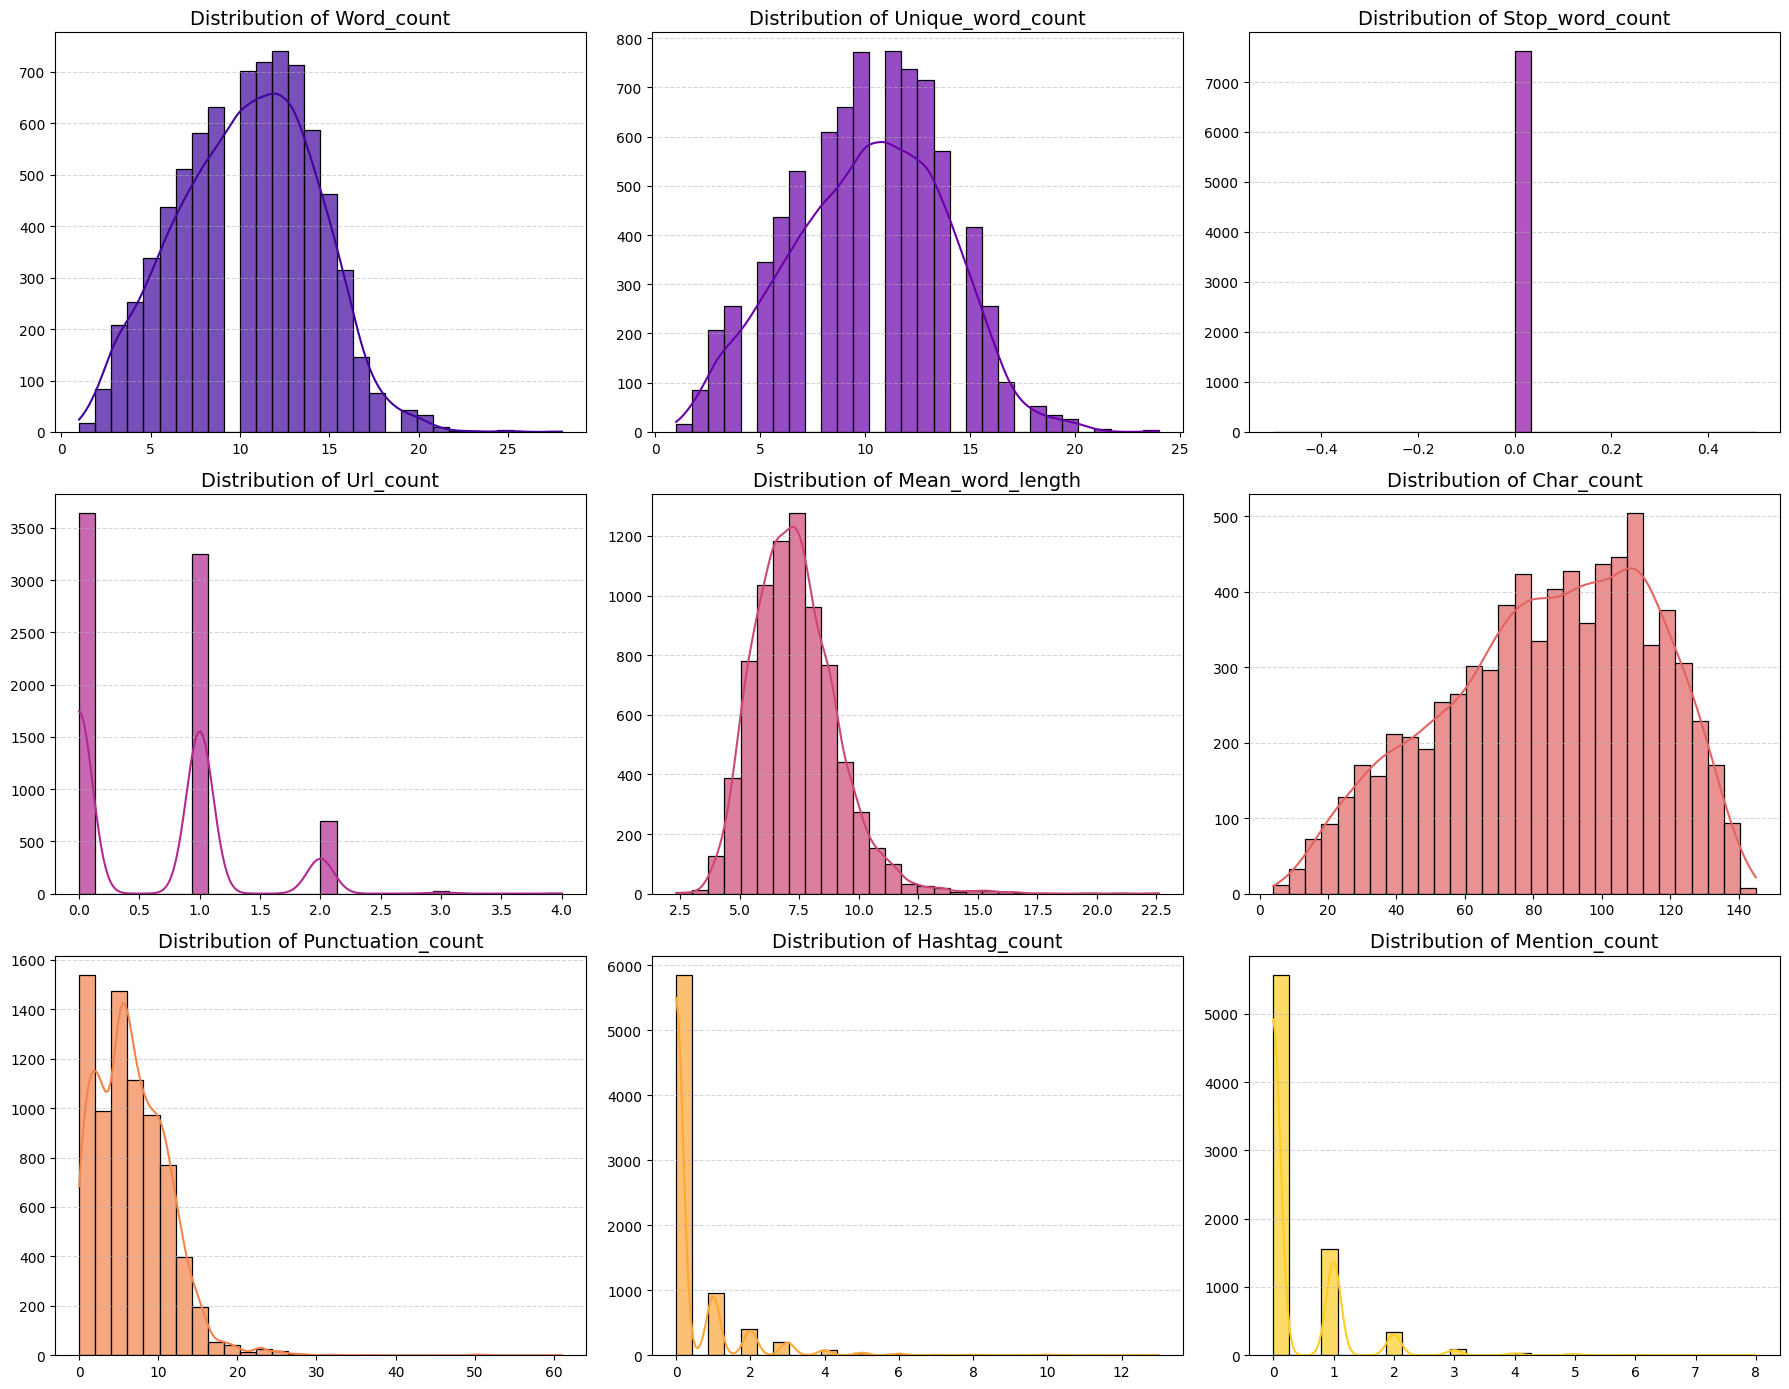

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to plot
features_to_plot = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count',
                    'mean_word_length', 'char_count', 'punctuation_count', 
                    'hashtag_count', 'mention_count']

# Define a palette of colors
palette = sns.color_palette("plasma", len(features_to_plot))

# Set up the plot grid
plt.figure(figsize=(18, 14))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    with pd.option_context('mode.use_inf_as_na', False):  # Suppress warning
        sns.histplot(train[feature], bins=30, kde=True, color=palette[i-1], alpha=0.7)
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [69]:
# Showing only
train['text'].apply(lambda x : x.lower())

0           deeds reason #earthquake may allah forgive us
1                  forest fire near la ronge sask. canada
2       residents asked 'shelter place' notified offic...
3       13,000 people receive #wildfires evacuation or...
4       got sent photo ruby #alaska smoke #wildfires p...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @thetawniest control wild fires c...
7610    m1.94 [01:04 utc]?5km volcano hawaii. http://t...
7611    police investigating e-bike collided car littl...
7612    latest: homes razed northern california wildfi...
Name: text, Length: 7613, dtype: object

In [70]:
# Commit to Table
train['text'] = train['text'].apply(lambda x : x.lower())

In [71]:
train.head()

,id,keyword,location,text,target,text_lenght,target_mean,post_text_lenght,text_processed,length,url_count,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1,69,NaN,45,deeds reason #earthquake may allah forgive us,45,0,7,7,0,5.571429,45,1,1,0
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,NaN,38,forest fire near la ronge sask. canada,38,0,7,7,0,4.571429,38,1,0,0
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1,133,NaN,91,residents asked 'shelter place' notified offic...,91,0,11,11,0,7.363636,91,3,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,NaN,61,"13,000 people receive #wildfires evacuation or...",61,0,7,7,0,7.857143,61,2,1,0
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1,88,NaN,57,got sent photo ruby #alaska smoke #wildfires p...,57,0,9,9,0,5.444444,57,2,2,0


In [72]:
columns_to_remove = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count',
                     'mean_word_length', 'char_count', 'punctuation_count',
                     'hashtag_count', 'mention_count']

train.drop(columns=columns_to_remove, inplace=True)
#train.drop(columns=['length'], inplace=True)

In [73]:
train.head()

,id,keyword,location,text,target,text_lenght,target_mean,post_text_lenght,text_processed,length
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1,69,NaN,45,deeds reason #earthquake may allah forgive us,45
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,NaN,38,forest fire near la ronge sask. canada,38
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1,133,NaN,91,residents asked 'shelter place' notified offic...,91
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,NaN,61,"13,000 people receive #wildfires evacuation or...",61
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1,88,NaN,57,got sent photo ruby #alaska smoke #wildfires p...,57


In [74]:
#import library and create a for loop for punctuation removal
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [75]:
#remove punctuation check results
train['text'].apply(remove_punctuations)

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [76]:
#remove punctuation check results - commit to table
train['text'] = train['text'].apply(remove_punctuations)

# 14/ Cleaning - Remove Stopwords

In [77]:
# Get Stopwords
stop = stopwords.words('english')

In [78]:
# Concatenate stopwords into a single string
stop_paragraph = ', '.join(stop)

# Print stopwords in a paragraph
print(stop_paragraph)

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [79]:
x = "i have a date on sunday with will!!"

In [80]:
[word for word in x.split() if word not in stop]

['date', 'sunday', 'will!!']

In [81]:
# Tokenize and Remove Stop Words
train['text'].apply(lambda x: [word for word in x.split() if word not in stop])

0       [deeds, reason, earthquake, may, allah, forgiv...
1           [forest, fire, near, la, ronge, sask, canada]
2       [residents, asked, shelter, place, notified, o...
3       [13000, people, receive, wildfires, evacuation...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, cranes, holding, bridge, collapse...
7609    [ariaahrary, thetawniest, control, wild, fires...
7610    [m194, 0104, utc5km, volcano, hawaii, httptcoz...
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, homes, razed, northern, california, w...
Name: text, Length: 7613, dtype: object

In [82]:
# Join the words back
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [83]:
train.head(10)

,id,keyword,location,text,target,text_lenght,target_mean,post_text_lenght,text_processed,length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,69,NaN,45,deeds reason #earthquake may allah forgive us,45
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38,NaN,38,forest fire near la ronge sask. canada,38
2,5,NaN,NaN,residents asked shelter place notified officer...,1,133,NaN,91,residents asked 'shelter place' notified offic...,91
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65,NaN,61,"13,000 people receive #wildfires evacuation or...",61
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88,NaN,57,got sent photo ruby #alaska smoke #wildfires p...,57
5,8,NaN,NaN,rockyfire update california hwy 20 closed dire...,1,110,NaN,99,#rockyfire update => california hwy. 20 closed...,99
6,10,NaN,NaN,flood disaster heavy rain causes flash floodin...,1,95,NaN,89,#flood #disaster heavy rain causes flash flood...,89
7,13,NaN,NaN,im top hill see fire woods,1,59,NaN,30,i'm top hill see fire woods...,30
8,14,NaN,NaN,theres emergency evacuation happening building...,1,79,NaN,61,there's emergency evacuation happening buildin...,61
9,15,NaN,NaN,im afraid tornado coming area,1,52,NaN,33,i'm afraid tornado coming area...,33


# 14/ Cleaning - Lemmatize

In [84]:
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


True

In [85]:
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.


In [86]:
wordnet = WordNetLemmatizer()

In [87]:
# Lemmatize
train['text'].apply(lambda x : wordnet.lemmatize(x))

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [88]:
# Commit to Table
train['text'] = train['text'].apply(lambda x : wordnet.lemmatize(x))

In [89]:
train.head()

,id,keyword,location,text,target,text_lenght,target_mean,post_text_lenght,text_processed,length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,69,NaN,45,deeds reason #earthquake may allah forgive us,45
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38,NaN,38,forest fire near la ronge sask. canada,38
2,5,NaN,NaN,residents asked shelter place notified officer...,1,133,NaN,91,residents asked 'shelter place' notified offic...,91
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65,NaN,61,"13,000 people receive #wildfires evacuation or...",61
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88,NaN,57,got sent photo ruby #alaska smoke #wildfires p...,57


# 15/ Post Pre Cleaning

In [90]:
# Create Length Feature
train['post_text_lenght'] = train['text'].apply(lambda x : len(x))
train.head()

,id,keyword,location,text,target,text_lenght,target_mean,post_text_lenght,text_processed,length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,69,NaN,44,deeds reason #earthquake may allah forgive us,45
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38,NaN,37,forest fire near la ronge sask. canada,38
2,5,NaN,NaN,residents asked shelter place notified officer...,1,133,NaN,88,residents asked 'shelter place' notified offic...,91
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65,NaN,59,"13,000 people receive #wildfires evacuation or...",61
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88,NaN,55,got sent photo ruby #alaska smoke #wildfires p...,57


# / Partition

In [91]:
y = train['target']
X = train.drop(columns=['target', 'id'])

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) # Can you stratify?

In [93]:
# for Proper distributio of Spam and Ham in the train and validation data set we stratified it, to learn the machine propely
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y) # Can you stratify?

In [94]:
# Applying the same transformations to the test dataset:

test['text'] = test['text'].apply(preprocessing)
X_test = test['text']

est = gs_pipe_dt.best_estimator_
predictions = est.predict(X_test)

In [95]:
X_train_cv = cv.transform(X_train['text']).toarray()
X_val_cv = cv.transform(X_val['text']).toarray()

In [96]:
cv.transform(X_train['text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
train_with_cv = pd.DataFrame(X_train_cv, columns= cv.get_feature_names_out())
train_with_cv.head()

,00,01,02,03,04,05,06,07,08,09,...,ûª,ûªs,ûªt,ûªve,ûï,ûïa,ûïthe,ûïwhen,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
columns_paragraph = ', '.join(train_with_cv.columns.tolist())
print(columns_paragraph[:1000])

00, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 100, 1000, 101, 11, 12, 12000, 13, 130, 133, 14, 15, 150, 16, 16yr, 17, 18, 19, 1945, 1980, 1st, 20, 2011, 2013, 2014, 2015, 21, 22, 23, 24, 25, 26, 27, 29, 2nd, 2pm, 30, 300, 300w, 30pm, 31, 32, 320, 33, 34, 35, 36, 360wisenews, 3g, 40, 4000, 45, 495, 4wd, 4x4, 50, 500, 52, 53inch, 54, 5km, 5th, 60, 600, 6aug, 70, 70th, 731, 75, 77, 90, 911, 94, 95, 97, aba, abandoned, abc, abcnews, ablaze, able, absolutely, abstorm, abuse, abused, access, accident, accidentally, accidents, according, account, accused, accuses, acres, across, act, action, actions, activated, activates, active, activity, acts, actual, actually, add, added, address, admits, adult, advance, advisory, af, affected, afghan, afghanistan, afraid, africa, afterlife, afternoon, aftershock, again, age, ago, agree, agreed, ah, ahead, aid, aim, ain, air, aircraft, airlines, airplane, airport, aka, al, alabama, alarm, alaska, alberta, album, alert, alive, all, allah, alleged, allow, allo

In [99]:
final_df = pd.DataFrame({
    'id': test['id'],
    'target': predictions
})

final_df.to_csv('submission.csv',index=False)

In [100]:
final_df.head(5)

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,0


In [101]:
!kaggle competitions submit -c nlp-getting-started -f submission.csv -m "Message"

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
